In [2]:
import zipfile 
import os 

zip_path = 'mushroom.zip'
extract_dir = 'mushroom_data'

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extracted files：", os.listdir(extract_dir))



Extracted files： ['agaricus-lepiota.data', 'agaricus-lepiota.names', 'expanded.Z', 'Index', 'README']


In [10]:
import pandas as pd

file_path = 'mushroom_data/agaricus-lepiota.data'
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]
df = pd.read_csv(file_path,header = None,names = columns)
# 查看前几行
print(df.head())
print(df.columns.tolist())
# 查看总列数
print(f"Number of columns: {df.shape[1]}")

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split 
#perform encoded 
df_encoded = pd.get_dummies(df)
X = df_encoded.iloc[:,2:]
y = df_encoded.iloc[:,1]  # → 取“class”列作为目标
#train and test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("y_train label distribution:\n", y_train.value_counts(normalize=True))
print("y_test label distribution:\n", y_test.value_counts(normalize=True))

Train size: (6499, 117)
Test size: (1625, 117)
y_train label distribution:
 class_p
False    0.517926
True     0.482074
Name: proportion, dtype: float64
y_test label distribution:
 class_p
False    0.518154
True     0.481846
Name: proportion, dtype: float64


In [12]:
from sklearn.tree import DecisionTreeClassifier 

def DecisionTree():
    DC_model = DecisionTreeClassifier(random_state=42)
    DC_model.fit(X_train, y_train)

    importance = DC_model.feature_importances_            # importance score for each feature
    top_5 = importance.argsort()[::-1][:5]                # get top 5 feature indices
    top_5_feature = list(X_train.columns[top_5])          # map indices back to column names

    return top_5_feature

DecisionTree()


['odor_n',
 'stalk-root_c',
 'stalk-surface-below-ring_y',
 'spore-print-color_r',
 'odor_a']

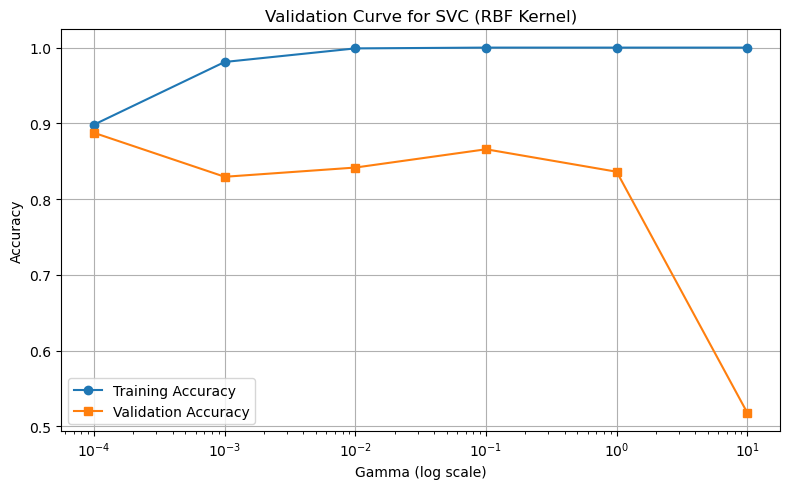

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

In [18]:
#support vector classifier to evaluate the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)).


import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

def evaluate_svc_gamma(X, y):
    param_range = np.logspace(-4, 1, 6)  # gamma: 0.0001 → 10

    clf = SVC(kernel='rbf', C=1, random_state=42)

    train_scores, test_scores = validation_curve(
        clf, X, y,
        param_name='gamma',
        param_range=param_range,
        cv=3,
        scoring='accuracy',
        n_jobs=2
    )

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.semilogx(param_range, train_mean, label='Training Accuracy', marker='o')
    plt.semilogx(param_range, test_mean, label='Validation Accuracy', marker='s')
    plt.xlabel("Gamma (log scale)")
    plt.ylabel("Accuracy")
    plt.title("Validation Curve for SVC (RBF Kernel)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return train_mean, test_mean

# 调用
evaluate_svc_gamma(X, y)

